# CLUSTERING (k-MEANS AND HIERARCHIAL ) ON IRIS SPECIES DATA

Clustering can be considered as a very relevant unsuperwised learning problem, which deals with finding a structure in some unlabelled data. It is the process of organizing objects into groups whose members are similar in some way.A cluster is therefore a collection of objects which are "similar" between them and "dissimilar" to objects belonging to other clusters. Typical applications of cluster analysis include identifying customer groups based on their purchase histories, classification of plants and animals based on their features, clustering observed earthquake epicenters to identify danger zones and so on.

We are here using the Iris species dataset, to identify clusters of the plant type. The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/iris. Besides, this is a well-known problem in the Machine Learning Literature , that this dataset is pre-included with R and Python packages for analysis. 

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

1. Id
2. SepalLengthCm
3. SepalWidthCm
4. PetalLengthCm
5. PetalWidthCm
6. Species (3 Classes)

The task is to apply clustering analysis to form groups/clusters of data that exihibits similar behaviour, disregarding the output class information. The analysis is done in Python 3 using two strategies :

 1. k-Means clustering
 2. Hierarchial clustering

Import required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

Read the dataset and view it

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.info()
iris.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


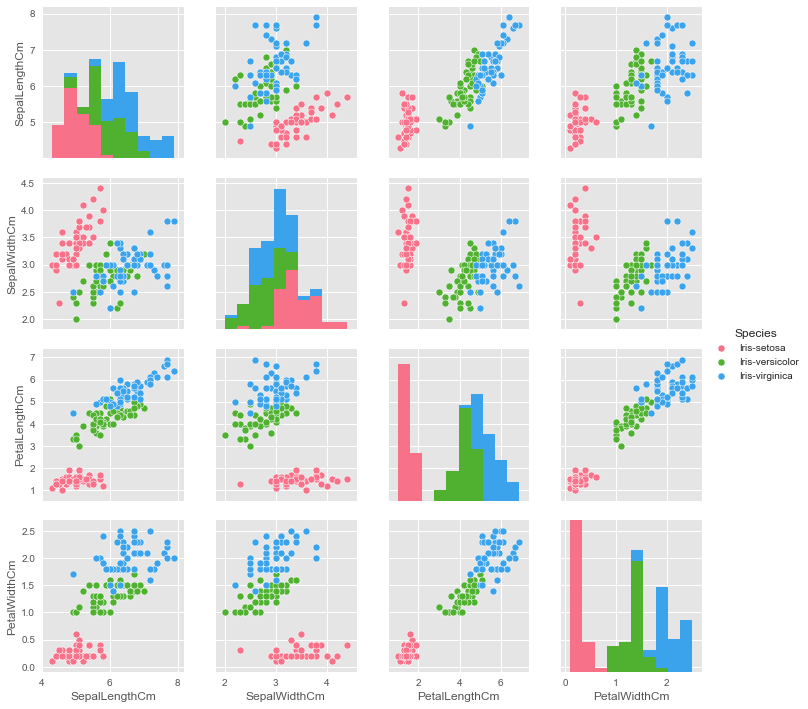

In [4]:
sns.pairplot(iris.iloc[:,[1,2,3,4,5]], hue='Species',palette="husl")

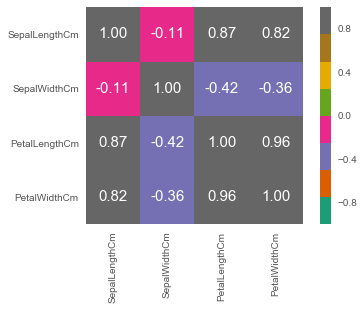

In [5]:
cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
corr_matrix = iris[cols].corr()
heatmap = sns.heatmap(corr_matrix,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols,cmap='Dark2')

From the correlation plot observe that the parameters PetalLengthCm and PetalWidthcm are highly correlated to each other. So lets do the cluster analysis using these features. 

In [7]:
X = iris.iloc[:,[3,4]].values

## k-Means clustering

The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided, starting with k initial centroids. Data points are clustered based on feature similarity. 

To identify the optimal number of clusters, lets make use of the Elbow method, which is based on the metric, WCSS, Within Cluster Sum of Squares

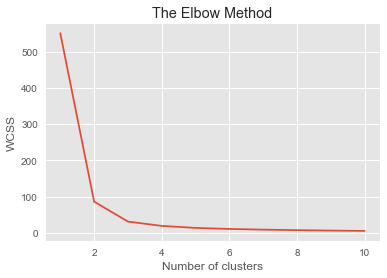

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot, we see that the elbow is at 3 number of clusters. Now lets fit the k-Means clustering algorithm using n_clusters = 3 and make predictions.

In [9]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

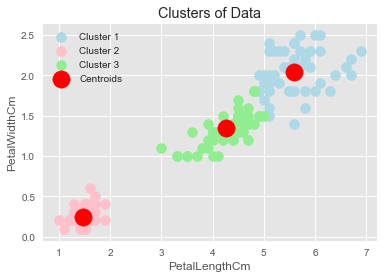

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'lightblue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'pink', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroids')
plt.title('Clusters of Data')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

Three clusters have been identified as above. Since Cluster 1 and 3 are not well-separable, they could be considered as one cluster as well.

## Hierarchial Agglomerative Clustering
Agglomerative hierarchical clustering is a bottom-up clustering method where clusters have sub-clusters, which in turn have sub-clusters, etc. Agglomerative hierarchical clustering starts with each gene or sample as a single cluster, then in each successive iteration, it merges two clusters together until all genes or samples are in one big cluster.

We make use of the Dendrogram method to identify the number of optimal clusters. The metric used is 'ward', which minimizes the variances between clusters.

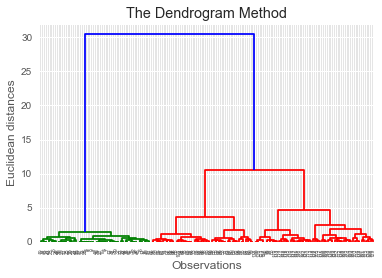

In [14]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) #'ward' minimizes the variances b/w clusters
plt.title('The Dendrogram Method')
plt.xlabel('Observations')
plt.ylabel('Euclidean distances')
plt.show()

The method identifies three clusters, n_clusters = 3. Now fit the HAC to the data using the AgglomerativeClustering class

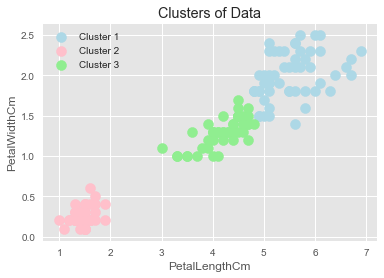

In [15]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'lightblue', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'pink', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'lightgreen', label = 'Cluster 3')
plt.title('Clusters of Data')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

## Concluding Remarks

1. The two methods of clustering , k-Means and Hierarchial , have been applied on the data. The number of clusters obtained = 3
2. Since, two clusters are not completely separable compared to the third one, we may consider the case with number of clusters =2 as well.